In [21]:
import os
import pandas as pd
import numpy as np 
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as npv
import cv2
import joblib
import os
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure
import seaborn as sns
import random
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import pygame
# from keras.utils import to_categorical
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine
#Ignore warning
import warnings
warnings.filterwarnings("ignore")

pygame 2.1.0 (SDL 2.0.16, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def featureAnalysis(feature,dataset):
    a = dataset.describe()
    b = a[feature].to_frame().T
    fig, ax = plt.subplots(2, 1, figsize=(20, 18))
    sns.histplot(x=dataset[feature], data=dataset, kde=True, element="step",ax=ax[0])
    sns.boxplot(data=dataset , x = feature ,ax=ax[1])
    return(b)

###  Emotion detection

In [ ]:
dataset_path = "Datasets/CK"

# Initialize lists to store pixel data and labels
pixel_data = []
labels = []

def process_images(folder_path, label):
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # Add more extensions if needed
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path)
            img_array = list(img.getdata())
            pixel_data.append(img_array)
            labels.append(label)

for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)
    if os.path.isdir(folder_path):
        process_images(folder_path, folder_name)

# Create a DataFrame
columns = [f"pixel_{i}" for i in range(len(pixel_data[0]))]
df = pd.DataFrame(pixel_data, columns=columns)
df['label'] = labels

In [3]:
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_2295,pixel_2296,pixel_2297,pixel_2298,pixel_2299,pixel_2300,pixel_2301,pixel_2302,pixel_2303,label
0,24,10,13,16,8,12,17,22,29,24,...,89,137,145,142,144,149,150,153,156,anger
1,17,10,16,15,7,11,15,22,28,19,...,90,136,145,145,147,149,151,153,156,anger
2,27,13,10,15,11,8,14,17,29,24,...,83,128,144,142,144,145,148,152,156,anger
3,36,32,17,15,17,20,29,45,58,70,...,15,0,0,0,9,61,129,140,142,anger
4,31,39,19,16,19,22,27,35,48,66,...,9,0,0,1,13,64,131,140,143,anger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,145,33,13,8,11,16,27,43,56,66,...,143,164,162,162,162,160,159,160,160,surprise
977,92,14,12,8,13,20,33,45,59,70,...,130,159,160,160,161,159,158,159,160,surprise
978,52,33,6,4,12,9,4,3,8,10,...,81,78,75,76,77,76,76,77,76,surprise
979,32,8,4,7,7,2,2,9,10,16,...,138,74,77,76,77,77,77,76,76,surprise


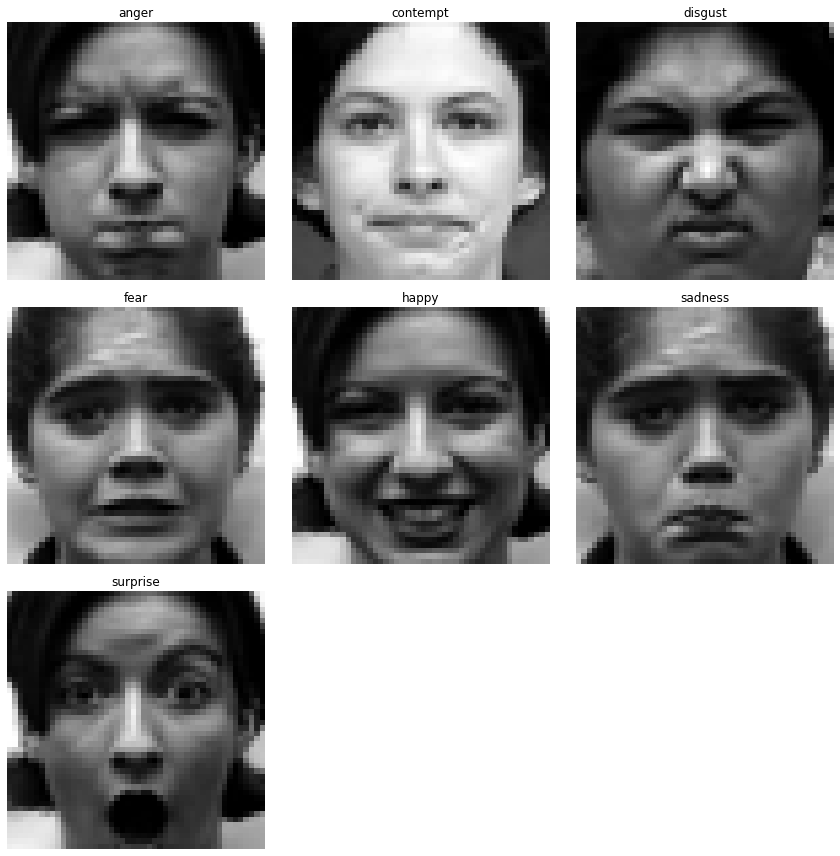

In [4]:
classes = df['label'].unique()

# Set up subplots in a 3x3 grid
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# Flatten the 2D array of subplots into a 1D array
axs = axs.flatten()

# Iterate through each class
for i, class_label in enumerate(classes):
    # Get the first image for the class
    image_data = df[df['label'] == class_label].iloc[0, :-1].values.astype(float).reshape(48, 48)  # Assuming images are 48x48

    # Plot the image
    axs[i].imshow(image_data, cmap='gray')  # Assuming grayscale images
    axs[i].set_title(class_label)
    axs[i].axis('off')  # Turn off axis for better visualization

# Remove any empty subplots
for j in range(len(classes), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [5]:
df['label'].nunique()

7

In [6]:
X = df.iloc[:, :-1].values
y = df['label'].values

# Convert string labels to integer labels
label_encoder = LabelEncoder()
y_str = df['label'].values
y_int = label_encoder.fit_transform(y_str)

X_normalized = X /255

# Reshape the input data to a 3D array (num_samples, height, width, channels)
X_reshaped = X_normalized.reshape(X_normalized.shape[0], 48, 48, 1)  # Assuming your image size is 48x48


# Convert labels to one-hot encoding
y_encoded = tf.keras.utils.to_categorical(y_int, num_classes=7)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)

# Define the CNN model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

# Output layer
model.add(layers.Dense(7, activation='softmax'))  # 7 output classes

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/25
20/20 [==============================] - 1s 45ms/step - loss: 1.8422 - accuracy: 0.2344 - val_loss: 1.8380 - val_accuracy: 0.2166
Epoch 2/25
20/20 [==============================] - 1s 38ms/step - loss: 1.8142 - accuracy: 0.2727 - val_loss: 1.7864 - val_accuracy: 0.3567
Epoch 3/25
20/20 [==============================] - 1s 40ms/step - loss: 1.5588 - accuracy: 0.4386 - val_loss: 1.3707 - val_accuracy: 0.4331
Epoch 4/25
20/20 [==============================] - 1s 47ms/step - loss: 1.1341 - accuracy: 0.5550 - val_loss: 1.0555 - val_accuracy: 0.5669
Epoch 5/25
20/20 [==============================] - 1s 40ms/step - loss: 0.9242 - accuracy: 0.6491 - val_loss: 0.8095 - val_accuracy: 0.6943
Epoch 6/25
20/20 [==============================] - 1s 44ms/step - loss: 0.6801 - accuracy: 0.7368 - val_loss: 0.5845 - val_accuracy: 0.7580
Epoch 7/25
20/20 [==============================] - 1s 42ms/step - loss: 0.5678 - accuracy: 0.7735 - val_loss: 0.5243 - val_accuracy: 0.7707
Epoch 8/25
20

In [7]:
model.save('emotionFace.h5')

In [8]:
import joblib
joblib.dump(label_encoder, 'label_encoder.joblib')

['label_encoder.joblib']

# 

### Age detection

In [3]:
UTKFace = pd.read_csv("Datasets/AgeDataset/4/utkface_sortAge.csv")

In [5]:
UTKFace.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
UTKFace

,age,gender,ethnicity,image
0,1,1,0,109 146 198 132 169 221 134 171 223 137 174 22...
1,1,0,3,0 1 2 2 1 1 5 1 0 11 3 3 1 0 6 27 35 45 97 111...
2,1,0,3,54 64 91 55 66 95 56 72 105 58 76 113 67 85 12...
3,1,0,3,80 98 125 77 94 129 113 131 169 147 169 201 16...
4,1,0,3,63 55 96 58 51 94 72 67 112 83 80 126 91 90 13...
...,...,...,...,...
23703,115,1,1,175 211 219 177 210 219 176 206 215 166 195 20...
23704,116,1,0,12 76 199 41 60 149 60 87 123 96 118 167 119 1...
23705,116,1,0,61 77 93 70 88 104 77 97 115 81 102 123 85 109...
23706,116,1,2,193 208 210 183 201 206 177 197 207 160 184 19...


In [20]:
image1 = UTKFace.loc[0]['image']

In [6]:
images = []
ages = []
genders = []

# Assuming 'os' module is already imported
for i in os.listdir('Datasets/AgeDataset/3/crop_part1')[::10]:
    split = i.split('_')
    ages.append(int(split[0]))
    genders.append(int(split[1]))
    images.append(Image.open('Datasets/AgeDataset/3/crop_part1/' + i))

In [7]:
len(ages)

469

In [8]:
directory = 'Datasets/AgeDataset/3/Sample/'
file_list = os.listdir(directory)
len(file_list)

8977

In [9]:
images = []
ages = []
genders = []

directory = 'Datasets/AgeDataset/3/Sample/'
file_list = os.listdir(directory)
for i in range(0, len(file_list)):
    file_name = file_list[i]
#     split = file_name.split('_')
#     ages.append(int(split[0]))
#     genders.append(int(split[1]))
#     image_path = os.path.join(directory, file_name)
#     images.append(Image.open(image_path))

In [10]:
len(file_list)

8977

In [11]:
file_list[2]

'10_0_0_20170103200522151.jpg.chip.jpg'

In [12]:
images = []
ages = []
genders = []

for i in range(0, len(file_list),2):
    file_name = file_list[i]
    split = file_name.split('_')
    ages.append(int(split[0]))
    genders.append(int(split[1]))
    image_path = os.path.join(directory, file_name)
    images.append(Image.open(image_path))

In [13]:
images = pd.Series(list(images), name = 'Images')
ages = pd.Series(list(ages), name = 'Ages')
genders = pd.Series(list(genders), name = 'Genders')

df = pd.concat([images, ages, genders], axis=1)
df

,Images,Ages,Genders
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10,0
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10,0
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10,0
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10,0
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10,0
...,...,...,...
4484,<PIL.JpegImagePlugin.JpegImageFile image mode=...,9,1
4485,<PIL.JpegImagePlugin.JpegImageFile image mode=...,9,1
4486,<PIL.JpegImagePlugin.JpegImageFile image mode=...,9,1
4487,<PIL.JpegImagePlugin.JpegImageFile image mode=...,9,1


In [14]:
df['Ages'].max()

79

,count,mean,std,min,25%,50%,75%,max
Ages,4489.0,26.992649,21.542049,1.0,7.0,24.0,43.0,79.0


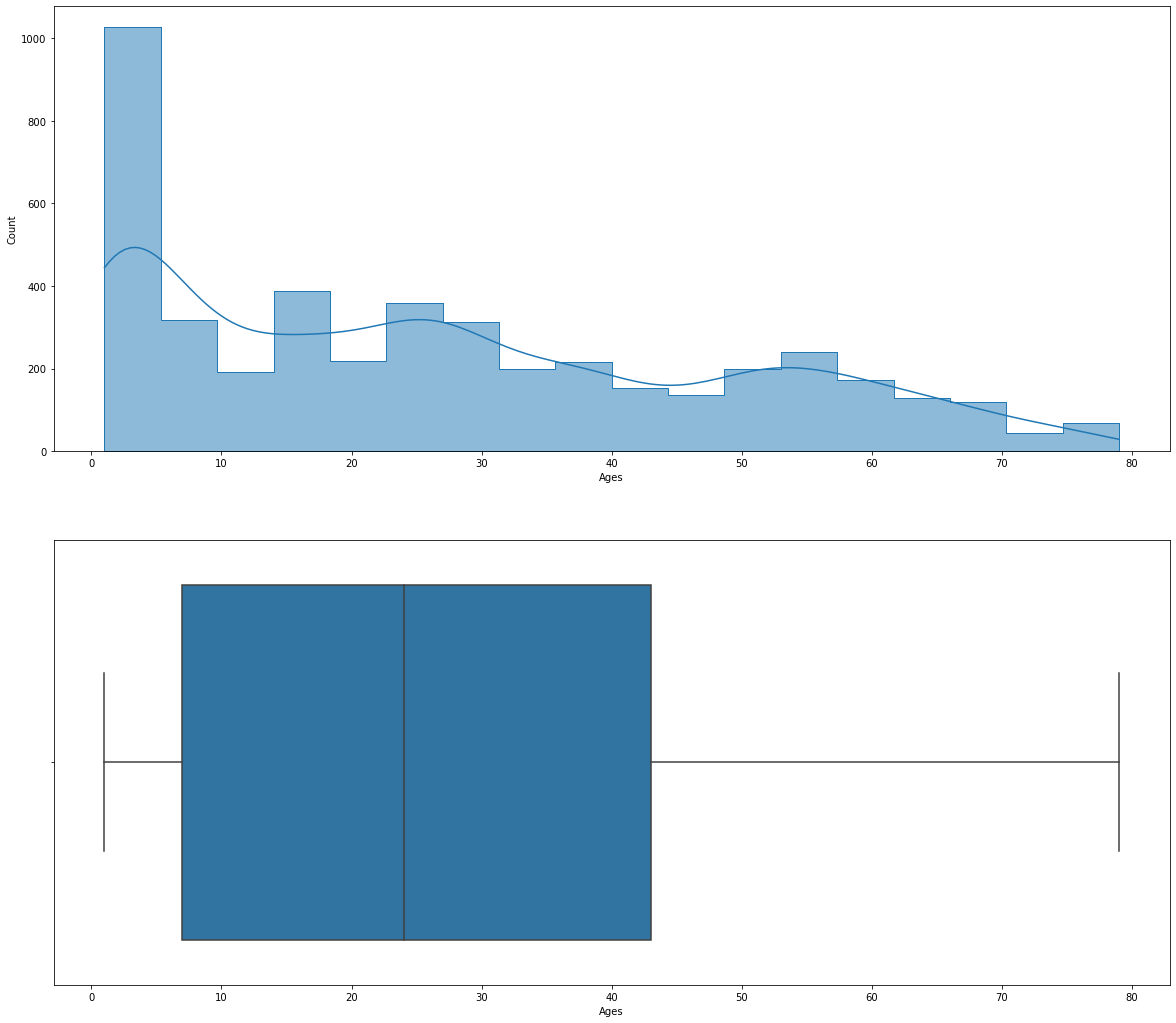

In [15]:
featureAnalysis('Ages',df)

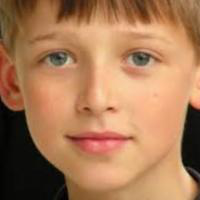

10 0


In [16]:
display(df['Images'][0])
print(df['Ages'][0], df['Genders'][0])

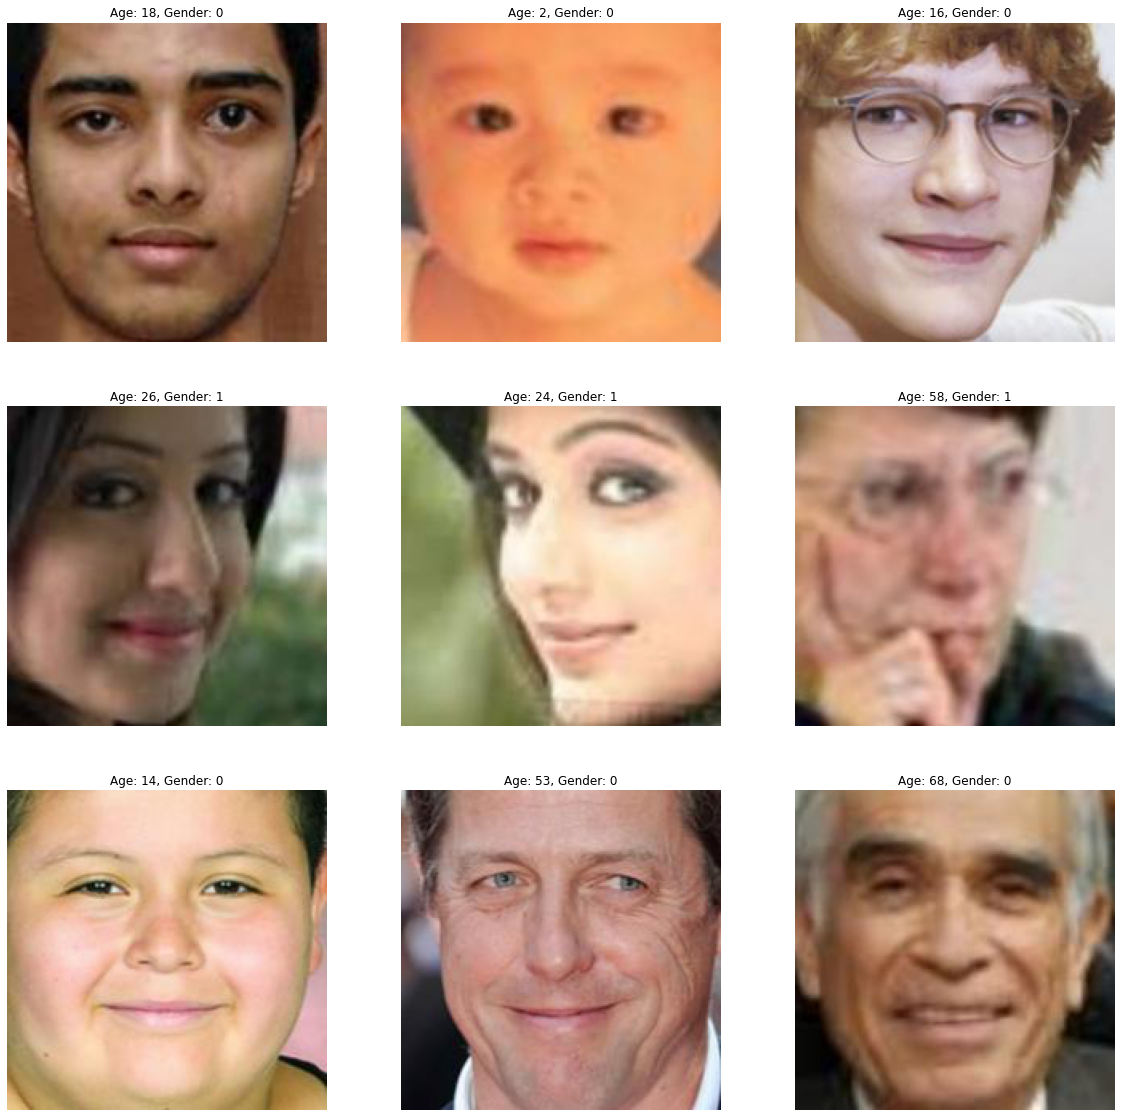

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

for i in range(3):
    for j in range(3):
        # Randomly select an index
        index = random.randint(0, len(df) - 1)
        
        # Display the image
        axes[i, j].imshow(df['Images'][index])
        axes[i, j].axis('off')  # Turn off axis
        
        # Set the title with age and gender information
        title = f"Age: {df['Ages'][index]}, Gender: {df['Genders'][index]}"
        axes[i, j].set_title(title)

plt.show()

In [18]:
#Assume minimum 
df = df[df['Ages'] > 4]

In [19]:
x = []
y = []

for i in range(len(df)):
    df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.ANTIALIAS)
    ar = np.asarray(df['Images'].iloc[i])
    x.append(ar)
    agegen = [int(df['Ages'].iloc[i]), int(df['Genders'].iloc[i])]
    y.append(agegen)
x = np.array(x)

C:\Users\ASUS02\AppData\Local\Temp/ipykernel_4776/2993096863.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.ANTIALIAS)
C:\Users\ASUS02\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [39]:
bins = [5, 10, 18, 25, 35, 45, 55, 65, 100]  # Define the bin edges
labels = ['5-10', '10-18', '18-25', '25-35', '35-45', '45-55', '55-65', 'above 65']  
df['Ages_Category'] = pd.cut(df['Ages'], bins=bins, labels=labels, right=False)
df['Ages_Category_Code'] = pd.factorize(df['Ages_Category'])[0] + 1
df

In [43]:
y_age = df['Ages_Category_Code']
x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age)

In [53]:
input_shape = (200, 200, 3)
num_classes = 8  
agemodel = Sequential()

agemodel.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(64, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(128, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Flatten())
agemodel.add(Dense(64, activation='relu'))
agemodel.add(Dropout(0.5))
agemodel.add(Dense(num_classes, activation='softmax'))  # Using softmax for multi-class classification
agemodel.compile(loss='categorical_crossentropy',  # Categorical crossentropy for multi-class classification
                 optimizer=optimizers.Adam(lr=0.0001),
                 metrics=['accuracy'])

X = df['Images']
y = df['Ages_Category_Code']  
X = np.array([np.array(img) for img in X])
X = X / 255.0
y_encoded = to_categorical(y - 1, num_classes=num_classes)

# y_encoded = to_categorical(y - 1, num_classes=num_classes)  # Subtracting 1 because you have labels from 1 to 7
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
#Fit
history1 = agemodel.fit(X_train, y_train, epochs=50, shuffle=True, validation_data=(X_test, y_test), callbacks=[reduce_lr])


Epoch 1/50
89/89 [==============================] - 80s 886ms/step - loss: 2.0749 - accuracy: 0.1344 - val_loss: 2.0486 - val_accuracy: 0.1899 - lr: 1.0000e-04
Epoch 2/50
89/89 [==============================] - 73s 818ms/step - loss: 2.0519 - accuracy: 0.1622 - val_loss: 2.0228 - val_accuracy: 0.2391 - lr: 1.0000e-04
Epoch 3/50
89/89 [==============================] - 76s 850ms/step - loss: 2.0224 - accuracy: 0.1805 - val_loss: 1.9940 - val_accuracy: 0.2616 - lr: 1.0000e-04
Epoch 4/50
89/89 [==============================] - 82s 918ms/step - loss: 1.9773 - accuracy: 0.1946 - val_loss: 1.9399 - val_accuracy: 0.2785 - lr: 1.0000e-04
Epoch 5/50
89/89 [==============================] - 81s 916ms/step - loss: 1.9320 - accuracy: 0.2002 - val_loss: 1.8812 - val_accuracy: 0.3052 - lr: 1.0000e-04
Epoch 6/50
89/89 [==============================] - 74s 833ms/step - loss: 1.9046 - accuracy: 0.2178 - val_loss: 1.8405 - val_accuracy: 0.3038 - lr: 1.0000e-04
Epoch 7/50
89/89 [======================

In [31]:
y_age = df['Ages']
y_gender = df['Genders']

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age)
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x, y_gender, test_size=0.2, stratify=y_gender)

In [35]:
df['Ages'].describe()

count    3553.000000
mean       33.595272
std        19.413863
min         5.000000
25%        17.000000
50%        30.000000
75%        50.000000
max        79.000000
Name: Ages, dtype: float64

In [22]:
from keras.callbacks import ReduceLROnPlateau

#Age model 
agemodel = Sequential()
agemodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
agemodel.add(MaxPooling2D((2,2)))

agemodel.add(Conv2D(64, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))

agemodel.add(Conv2D(128, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))

agemodel.add(Conv2D(256, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))

agemodel.add(Flatten())
agemodel.add(Dense(128, activation='relu'))
agemodel.add(Dropout(0.5))
agemodel.add(Dense(64, activation='relu'))
agemodel.add(Dropout(0.5))
agemodel.add(Dense(1, activation='relu'))


datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train1 = datagen.flow(x_train_age, y_train_age, batch_size=32)

test1 = test_datagen.flow(
        x_test_age, y_test_age,
        batch_size=32)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

agemodel.compile(loss='mean_squared_error', optimizer=optimizers.Adam(lr=0.0001))

history1 = agemodel.fit(train1, epochs=50, shuffle=True, validation_data=test1, callbacks=[reduce_lr])

# history1 = agemodel.fit(train1, epochs=50, shuffle=True, validation_data=test1)

C:\Users\ASUS02\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
89/89 [==============================] - 98s 1s/step - loss: 915.6436 - val_loss: 439.8482 - lr: 1.0000e-04
Epoch 2/50
89/89 [==============================] - 93s 1s/step - loss: 671.8562 - val_loss: 398.7581 - lr: 1.0000e-04
Epoch 3/50
89/89 [==============================] - 95s 1s/step - loss: 630.1174 - val_loss: 421.1797 - lr: 1.0000e-04
Epoch 4/50
89/89 [==============================] - 94s 1s/step - loss: 562.7318 - val_loss: 414.7079 - lr: 1.0000e-04
Epoch 5/50
89/89 [==============================] - 93s 1s/step - loss: 537.1065 - val_loss: 387.5913 - lr: 1.0000e-04
Epoch 6/50
89/89 [==============================] - 94s 1s/step - loss: 540.5825 - val_loss: 367.8678 - lr: 1.0000e-04
Epoch 7/50
89/89 [==============================] - 94s 1s/step - loss: 527.7996 - val_loss: 399.4180 - lr: 1.0000e-04
Epoch 8/50
89/89 [==============================] - 93s 1s/step - loss: 527.2811 - val_loss: 363.2897 - lr: 1.0000e-04
Epoch 9/50
89/89 [==============================

KeyboardInterrupt: 

In [16]:
agemodel = Sequential()
agemodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(64, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(128, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Flatten())
agemodel.add(Dense(64, activation='relu'))
agemodel.add(Dropout(0.5))
agemodel.add(Dense(1, activation='relu'))

agemodel.compile(loss='mean_squared_error',
             optimizer=optimizers.Adam(lr=0.0001))

genmodel = Sequential()
genmodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(64, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(128, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Flatten())
genmodel.add(Dense(64, activation='relu'))
genmodel.add(Dropout(0.5))
genmodel.add(Dense(1, activation='sigmoid'))

genmodel.compile(loss='binary_crossentropy',
             optimizer=optimizers.Adam(lr=0.0001),
             metrics=['accuracy'])

C:\Users\ASUS02\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [17]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train1 = datagen.flow(x_train_age, y_train_age, batch_size=32)

test1 = test_datagen.flow(
        x_test_age, y_test_age,
        batch_size=32)

history1 = agemodel.fit(train1, epochs=50, shuffle=True, validation_data=test1)

Epoch 1/50
89/89 [==============================] - 144s 2s/step - loss: 562.2150 - val_loss: 411.2399
Epoch 2/50
89/89 [==============================] - 332s 4s/step - loss: 443.9551 - val_loss: 412.3975
Epoch 3/50
89/89 [==============================] - 356s 4s/step - loss: 429.4689 - val_loss: 421.2045
Epoch 4/50
89/89 [==============================] - 368s 4s/step - loss: 417.2769 - val_loss: 414.4648
Epoch 5/50
89/89 [==============================] - 354s 4s/step - loss: 376.4250 - val_loss: 339.5193
Epoch 6/50
89/89 [==============================] - 355s 4s/step - loss: 361.5434 - val_loss: 309.1431
Epoch 7/50
89/89 [==============================] - 358s 4s/step - loss: 349.6834 - val_loss: 299.2895
Epoch 8/50
89/89 [==============================] - 367s 4s/step - loss: 336.2839 - val_loss: 290.0914
Epoch 9/50
89/89 [==============================] - 356s 4s/step - loss: 331.2632 - val_loss: 300.8495
Epoch 10/50
89/89 [==============================] - 355s 4s/step - loss:

In [18]:
agemodel.save('ageFaceDetection.h5')

In [38]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train2 = datagen.flow(x_train_gender, y_train_gender, batch_size=64)

test2 = test_datagen.flow(
        x_test_gender, y_test_gender,
        batch_size=64)

history2 = genmodel.fit(train2, epochs=50, shuffle=True, validation_data=test2)

Epoch 1/50
45/45 [==============================] - 316s 7s/step - loss: 0.6344 - accuracy: 0.6305 - val_loss: 0.5843 - val_accuracy: 0.6807
Epoch 2/50
45/45 [==============================] - 305s 7s/step - loss: 0.5916 - accuracy: 0.6872 - val_loss: 0.5582 - val_accuracy: 0.7257
Epoch 3/50
45/45 [==============================] - 289s 6s/step - loss: 0.5595 - accuracy: 0.7125 - val_loss: 0.5350 - val_accuracy: 0.7159
Epoch 4/50
45/45 [==============================] - 292s 6s/step - loss: 0.5395 - accuracy: 0.7350 - val_loss: 0.5186 - val_accuracy: 0.7426
Epoch 5/50
45/45 [==============================] - 306s 7s/step - loss: 0.5139 - accuracy: 0.7533 - val_loss: 0.5555 - val_accuracy: 0.7187
Epoch 6/50
45/45 [==============================] - 322s 7s/step - loss: 0.5054 - accuracy: 0.7583 - val_loss: 0.4726 - val_accuracy: 0.7764
Epoch 7/50
45/45 [==============================] - 266s 6s/step - loss: 0.4767 - accuracy: 0.7847 - val_loss: 0.4571 - val_accuracy: 0.7722
Epoch 8/50
45

In [40]:
genmodel.save('genderFace.h5')

# 

### Real time Face Detection

In [30]:
labels = pd.read_csv(("Datasets/label_image.csv"))
labels.drop(['Unnamed: 0'],axis=1,inplace=True)

In [31]:
df = labels.copy()
df

,frustrated,tense,excited,happy,content,calm,tired,depressed,song_id
0,0,0,0,0,0,0,1,1,2
1,0,0,0,0,0,0,1,1,3
2,0,1,1,1,1,0,0,0,4
3,1,1,1,0,0,0,0,1,5
4,0,1,1,1,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...
1797,0,0,0,0,1,1,1,0,2054
1798,0,1,1,0,0,0,0,0,2055
1799,0,0,0,0,0,1,1,0,2056
1800,1,1,0,0,0,0,0,0,2057


In [32]:
def play_mp3(song_id):
    mp3_file_path = "Datasets/DEAM/MEMD_audio/"+str(song_id)+ ".mp3"
    # Initialize Pygame
    pygame.init()

    try:
        # Load the MP3 file
        pygame.mixer.music.load(mp3_file_path)

        # Play the MP3 file
        pygame.mixer.music.play()

        # Wait for the music to finish playing
        while pygame.mixer.music.get_busy():
            pygame.time.Clock().tick(10)

    except pygame.error as e:
        print("Error: Unable to load or play the MP3 file.")
        print(e)

    finally:
        # Quit Pygame
        pygame.quit()

In [33]:
def play_song_based_on_face(duration_dict):
    emotion_dict = {}
    emotion_dict['frustrated'] = 0
    emotion_dict['tense'] = 0
    emotion_dict['excited'] = 0
    emotion_dict['happy'] = 0
    emotion_dict['content'] = 0
    emotion_dict['tired'] = 0
    emotion_dict['depressed'] = 0
    emotion_dict['calm'] = 0
    
    
    for key, value in duration_dict.items():
        if duration_dict['anger'] > 0:
            emotion_dict['tense'] = 1 * duration_dict['anger']

        if duration_dict['contempt']  > 0:
            emotion_dict['content'] = 1 * duration_dict['contempt']

        if duration_dict['disgust']  > 0:
            emotion_dict['frustrated'] = 1 * duration_dict['disgust']

        if duration_dict['fear']  > 0:
            emotion_dict['calm'] = 1 * duration_dict['fear']

        if duration_dict['sadness']  > 0:
            emotion_dict['depressed'] = 1 * duration_dict['sadness']
            emotion_dict['frustrated'] = 3/4 * duration_dict['sadness']
            emotion_dict['tired'] = 1/2 * duration_dict['sadness']


        if duration_dict['happy']  > 0:
            emotion_dict['happy'] = 1 * duration_dict['happy']

        if duration_dict['surprise']  > 0:
            emotion_dict['excited'] = 1 * duration_dict['surprise']
        
    similarities = df.apply(lambda row: 1 - cosine(row[:-1], list(emotion_dict.values())), axis=1)
    df['similarity'] = similarities
    top_similar_songs = df.nlargest(1, 'similarity')['song_id']
    song_id = top_similar_songs.values[0]
    play_mp3(song_id)


In [34]:
import cv2
import numpy as np
import joblib
import tensorflow as tf
import time

# Load the pre-trained emotion model and label encoder
emotion_model = tf.keras.models.load_model('emotionFace.h5')
label_encoder = joblib.load('label_encoder.joblib')

# Load the Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open the webcam
cap = cv2.VideoCapture(0)

# Initialize the emotion count dictionary and duration dictionary
emotion_count = {emotion: 0 for emotion in label_encoder.classes_}
duration_dict = {emotion: 0 for emotion in label_encoder.classes_}

# Set the duration for real-time detection (in seconds)
detection_duration = 15

# Record the start time
start_time = time.time()

while time.time() - start_time < detection_duration:
    # Capture a frame from the webcam
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Extract the face region from the frame
        face_roi = gray[y:y + h, x:x + w]
        face_img = cv2.resize(face_roi, (48, 48))
        face_img = np.expand_dims(face_img, axis=0)
        face_img = face_img / 255.0

        # Predict emotion using the trained model
        emotion_probabilities = emotion_model.predict(face_img)
        emotion_label = np.argmax(emotion_probabilities)
        emotion_text = label_encoder.classes_[emotion_label]

        # Update the emotion count dictionary
        emotion_count[emotion_text] += 1

        # Draw rectangle around the face and display emotion text
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(frame, emotion_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2, cv2.LINE_AA)

    # Display the frame with face and emotion detection
    cv2.imshow('Face and Emotion Detection', frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Record the end time
end_time = time.time()

# Calculate the duration for each emotion
for emotion in label_encoder.classes_:
    duration_dict[emotion] = emotion_count[emotion] / (end_time - start_time)

# Print the duration for each observed emotion as a dictionary
print("Duration (seconds) observed for each emotion:")
print(duration_dict)

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()

play_song_based_on_face(duration_dict)
df = labels.copy()

Duration (seconds) observed for each emotion:
{'anger': 0.2660326617684749, 'contempt': 3.5249327684322926, 'disgust': 0.0, 'fear': 1.3301633088423745, 'happy': 9.776700319991452, 'sadness': 0.0, 'surprise': 0.0}
